In [1]:
# Harbinger Package
# version 1.0.737

source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger-examples/main/jupyter.R")

#loading Harbinger
load_library("daltoolbox") 
load_library("harbinger") 

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Loading required package: harbinger



In [2]:
#loading the example database
data(har_examples)

In [3]:
#Using the time series 17 
dataset <- har_examples$example17
dataset$event <- factor(dataset$event, labels=c("FALSE", "TRUE"))
head(dataset)

,serie,event
,<dbl>,<fct>
1,1.0000000,FALSE
2,0.9689124,FALSE
3,0.8775826,FALSE
4,0.7316889,FALSE
5,0.5403023,FALSE
6,0.3153224,FALSE


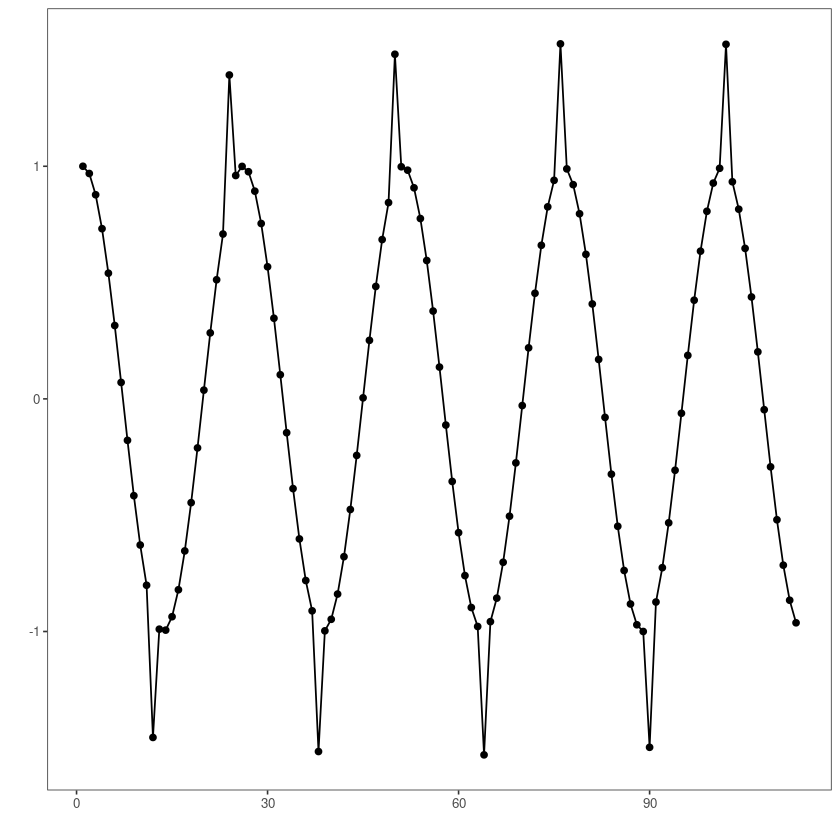

In [4]:
#ploting serie #1
plot_ts(x = 1:length(dataset$serie), y = dataset$serie)

In [5]:
#data preprocessing
slevels <- levels(dataset$event)

train <- dataset[1:80,]
test <- dataset[-(1:80),]

norm <- minmax()
norm <- fit(norm, train)
train_n <- transform(norm, train)
summary(train_n)

     serie          event   
 Min.   :0.0000   FALSE:74  
 1st Qu.:0.2848   TRUE : 6  
 Median :0.5292             
 Mean   :0.5167             
 3rd Qu.:0.7491             
 Max.   :1.0000             

In [6]:
model <- hanc_ml(cla_mlp("event", slevels, size=3,decay=0.03))

In [7]:
# fitting the model
model <- fit(model, train_n)
detection <- detect(model, train_n)
print(detection |> dplyr::filter(event==TRUE))
# evaluating the training
evaluation <- evaluate(model, detection$event, as.logical(train_n$event))
print(evaluation$confMatrix)

[1] idx   event type 
<0 rows> (or 0-length row.names)
          event      
detection TRUE  FALSE
TRUE      0     0    
FALSE     6     74   


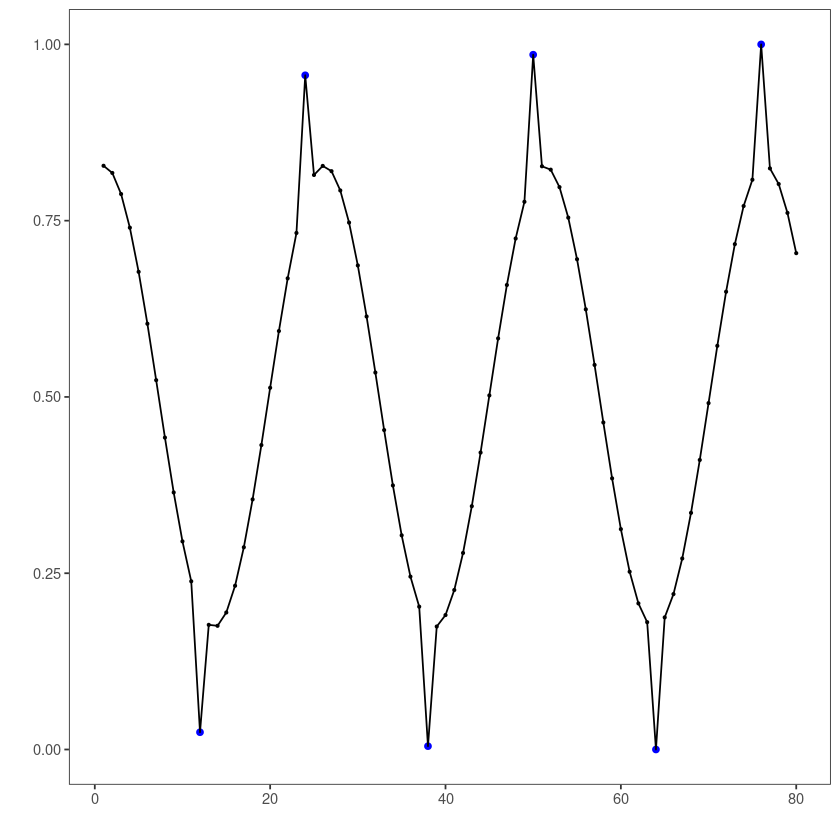

In [8]:
# ploting training results
  grf <- har_plot(model, train_n$serie, detection, as.logical(train_n$event))
  plot(grf)

In [9]:
# preparing for testing
  test_n <- transform(norm, test)

In [10]:
# evaluating the detections during testing
  detection <- detect(model, test_n)

  print(detection |> dplyr::filter(event==TRUE))

  evaluation <- evaluate(model, detection$event, as.logical(test_n$event))
  print(evaluation$confMatrix)

[1] idx   event type 
<0 rows> (or 0-length row.names)
          event      
detection TRUE  FALSE
TRUE      0     0    
FALSE     2     31   


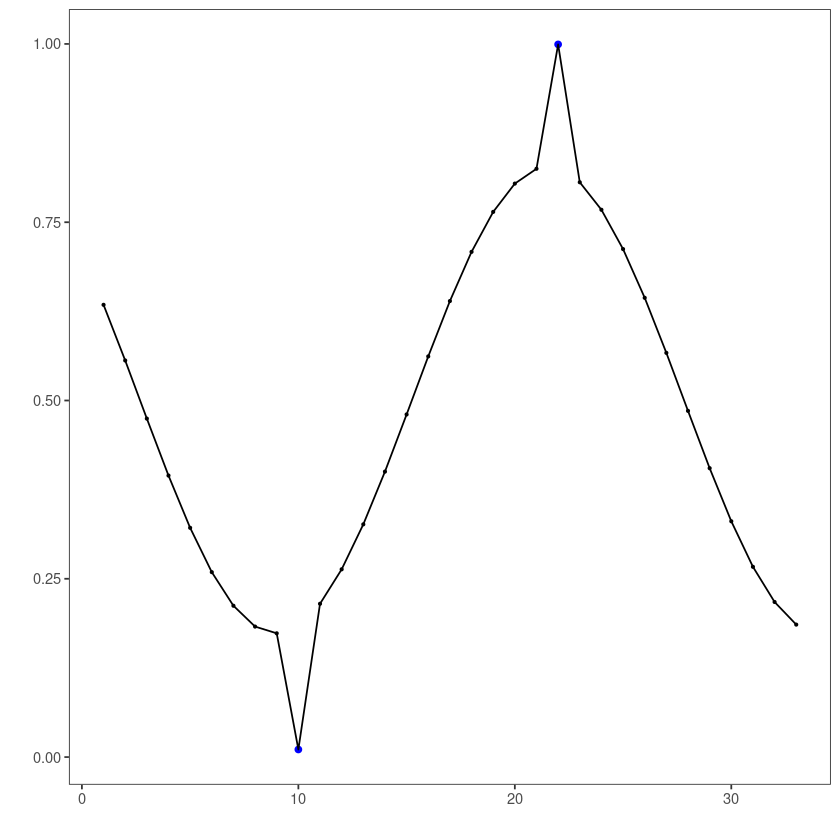

In [11]:
# ploting the results during testing
  grf <- har_plot(model, test_n$serie, detection, as.logical(test_n$event))
  plot(grf)